In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import fredpy as fp
import numpy as np

In [2]:
# Import data from Shiller's website, using only date and housing price index columns
data = pd.read_excel('http://www.econ.yale.edu/~shiller/data/Fig3-1.xls',sheet_name='Data',skiprows=6,index_col=0)['From fig2.1Revised2011.xls']

# Drop missing data from end
data = data.dropna()

# Parse date numbers into strings and set index
data.index = pd.DatetimeIndex([str(int(1+round((d-np.floor(d))*12))).zfill(2)+'-01-'+str(int(np.floor(d))) for d in data.index])

# Start data in first ful year available.
data = data.loc['1954-01-01':]

# Reset index to monthly frequency
data.index = pd.date_range(start=data.index[0], end=data.index[-1], freq='MS')

In [3]:
# Import CPI data
cpi = fp.series('CPIAUCSL')

# Import PCE deflator data
pce = fp.series('PCEPI')

In [4]:
# Create DataFrame with monthly data
df = pd.concat([data,cpi.data,pce.data],axis=1).dropna()
cpi_col = 'cpi'+' ('+cpi.units.split(' ')[1]+')'
pce_col = 'pce'+' ('+pce.units.split(' ')[1]+')'
df.columns = ['hpi',cpi_col,pce_col]

df['real hpi (cpi)'] = df.hpi/df[cpi_col]*100
df['real hpi (pce)'] = df.hpi/df[pce_col]*100
                          
# Export data
df.to_csv('hpi_monthly.csv',index=False)

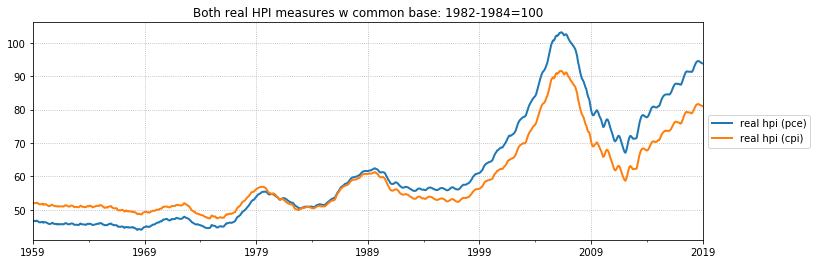

In [5]:
# Plot real house price index, with pce delfated series normalized to CPI base year
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
(df['real hpi (pce)']*pce.data.loc['1983-08-01']/100).plot(lw=2)
df['real hpi (cpi)'].plot(lw=2)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title('Both real HPI measures w common base: '+cpi.units.split(' ')[1])
ax.grid(ls=':')

In [6]:
# Create DataFrame with quarterly data
df = df.asfreq('QS')
                          
# Export data
df.to_csv('hpi_quarterly.csv',index=False)